In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
cancer = datasets.load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
len(cancer.data)

569

In [6]:
len(cancer.data[0])

30

In [7]:
print(cancer.data[0][0])

17.99


In [8]:
df=pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [9]:
print(df)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [10]:
len(cancer.feature_names)

30

In [11]:
df.iloc[99]

mean radius                 14.420000
mean texture                19.770000
mean perimeter              94.480000
mean area                  642.500000
mean smoothness              0.097520
mean compactness             0.114100
mean concavity               0.093880
mean concave points          0.058390
mean symmetry                0.187900
mean fractal dimension       0.063900
radius error                 0.289500
texture error                1.851000
perimeter error              2.376000
area error                  26.850000
smoothness error             0.008005
compactness error            0.028950
concavity error              0.033210
concave points error         0.014240
symmetry error               0.014620
fractal dimension error      0.004452
worst radius                16.330000
worst texture               30.860000
worst perimeter            109.500000
worst area                 826.400000
worst smoothness             0.143100
worst compactness            0.302600
worst concav

In [12]:
df[99:100]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
99,14.42,19.77,94.48,642.5,0.09752,0.1141,0.09388,0.05839,0.1879,0.0639,...,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353


In [13]:
import matplotlib

In [14]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
malignant=0
benign=0
for tumor in cancer.target:
    if tumor==0:
        malignant+=1
    else:
        benign+=1
print("benign=",benign)
print("malignant=",malignant)

benign= 357
malignant= 212


In [16]:
import matplotlib.pyplot as plt

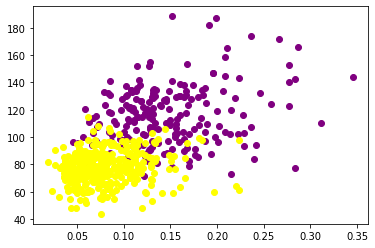

In [17]:
mc_malignant=[]
mc_benign=[]
mp_malignant=[]
mp_benign=[]
for i in range(len(cancer.target)):
    if cancer.target[i]==1:
        mc_benign.append(df['mean compactness'][i])
        mp_benign.append(df['mean perimeter'][i])
    else:
        mc_malignant.append(df['mean compactness'][i])
        mp_malignant.append(df['mean perimeter'][i])
plt.scatter(mc_malignant,mp_malignant,color='purple')
plt.scatter(mc_benign,mp_benign,color='yellow')

In [18]:
#making our work easy by adding these columns to the data frame
df['target']=cancer.target
df['tumor type']=[cancer.target_names[i] for i in cancer.target]


In [19]:
target=df['target']
import numpy as np
len(np.where(target==0)[0])

212

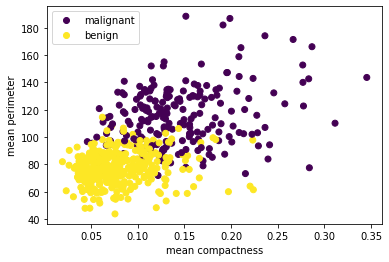

In [20]:
scatter=plt.scatter(df['mean compactness'],df['mean perimeter'],c=df['target'])
plt.xlabel('mean compactness')
plt.ylabel('mean perimeter')
plt.legend(handles=scatter.legend_elements()[0], labels=list(cancer.target_names))

<AxesSubplot:xlabel='mean compactness', ylabel='mean perimeter'>

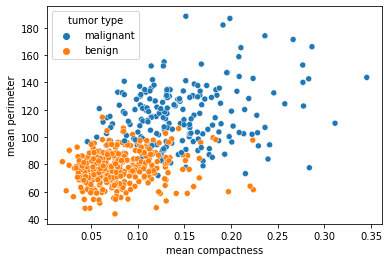

In [22]:
sns.scatterplot(x='mean compactness', y='mean perimeter', hue='tumor type' ,data=df)

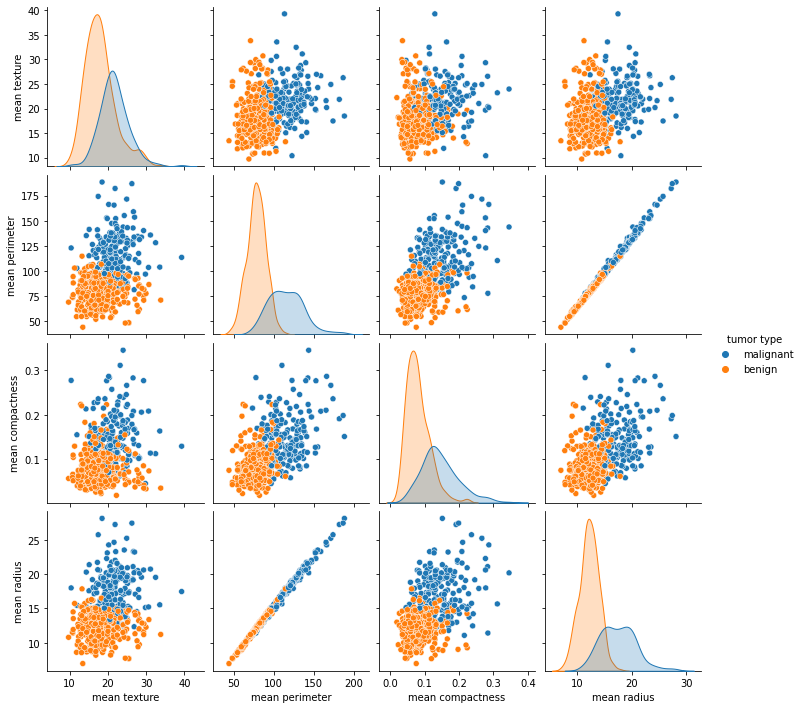

In [25]:
sns.pairplot(df, vars=['mean texture', 'mean perimeter', 'mean compactness', 'mean radius'], hue='tumor type')